<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/01_Neural_Network_Regression_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction Regression with Neural Network in TensorFlow**

There are many definitions for the regression problem but in our case, we're going to simplify it. Predicting a number based few inputs called features and label called output

More simple : Predicting a number

In [1]:
# Import TensorFlow

import tensorflow as tf

print(tf.__version__)

2.14.0


**Creating data to view and fit**

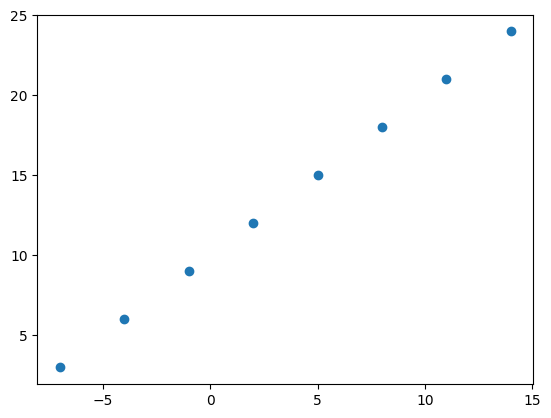

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Create features

X = np.array([-7.0, -4.0,-1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize it
plt.scatter(X,y)



In [3]:
y == X + 10 #if we closely observe the relation between above graph then we can realize as it is as true y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

**Input and Output Shapes**

In [5]:
#Create a demo tensor for our housing price prediction problems

house_info = tf.constant(["bedroom", "bathroom", "garage"]) # Shape would be 3
house_price = tf.constant([939700])   # Shape would be 1
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
X[1], y[1]

(-4.0, 6.0)

In [9]:
# turn our numpy arrays as tensors

X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape    # as scalar has shape 0 it will not give us the shape
output_shape = y[0].shape   # as scalar has shape 0 it will not give us the shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

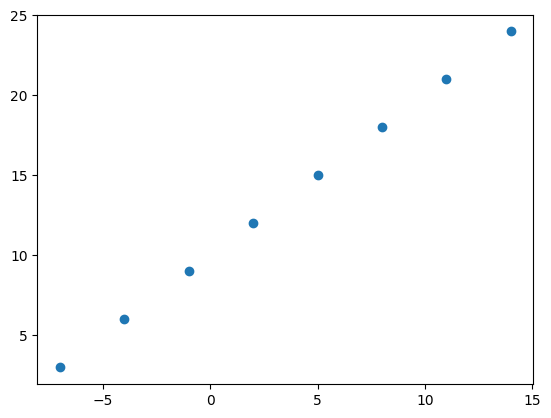

In [12]:
plt.scatter(X,y)

**Steps in modeling with TensorFlow**

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.

2. Compile the model- Define the loss function (In other words, the function which tells our model how wrong it is) and the optimizer (Tells our model how to improve the patters it's learning) and evaluation metrics (what we can use to interpret the performance of our model)

3. Fitting the model- Letting the model try to find the patterns between X & y (features and labels)


In [13]:
# Set random seed

tf.random.set_seed(42)

# 1. Create a model using the sequential API

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

# Compile the model ( mar : Mean Absolute Error : Computes the mean absolute error between labels and predictions)
model.compile (loss = tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),  # SGD is short for
               metrics = ["mea"])


# 3. Fit the model

model.fit(X,y, epochs =5)
